# PA 2: Classification - Decision Tree

## Student Details

Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions


Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-50 points]


## Programming Assignment Details


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Heart dataset from cardio_train.csv  [2 points]


2) Create a dataframe and print the first and last five records of your dataset.  [2 points]


3) Print the class labels.  [2 points]


4) Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]


# DecisionTree
1) Use gini and entropy to measure the quality of a split.  [2.5 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [2.5 points]


4) Print the decision tree visualization.  [5 points]


# Naive Bayes


1) Use Naive bayes classifier (Gaussian) to predict the test data[2.5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [2.5 points]


## Report


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [5 points]


2) Describe the datasets [5 points] and if you have done any pre-processing , and your code. [2 points]


4) Visualization of the decision tree for gini and entropy.[8 points]


5) Interpret your results, and do not forget to compare gini and entropy [10 points]

Do not to forget to cite your sources!


Step 3: Save your report file as 'yourLastName_Last4digitsofyourID_DT.doc'  [1 point]

Step 4: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

1) Load Heart dataset from cardio_train.csv  [2 points]

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.naive_bayes import GaussianNB
import pydotplus as pydot

# Loading dataset from csv
heart_dataset = pd.read_csv('cardio_train.csv', sep=";")

# Drop duplicates
heart_dataset.drop_duplicates(inplace=True)

# To drop rows having any negative value
heart_dataset = heart_dataset.drop(heart_dataset[(heart_dataset < 0).any(1)].index.tolist())

# Convert age from days to year
heart_dataset['age'] = np.floor(heart_dataset['age']/365)

2) Create a dataframe and print the first and last five records of your dataset.  [2 points]

In [12]:
print("The first 5 records are :")
print(heart_dataset.head(5))                               # Print first 5 records
print("\n")
print("The last 5 records are :")
print(heart_dataset.tail(5))                               # Print last 5 records

The first 5 records are :
   id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  51.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  47.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


The last 5 records are :
          id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  52.0       2     168    76.0    120     80            1     1   
69996  99995  61.0       1     158   126.0    140     90            2     2   
69997  99996  52.0       2     183   105.0    180     90            3     1   


3) Print the class labels. [2 points]

In [13]:
labels = list(heart_dataset.cardio.unique())        # Fetching class labels and print them
print(labels)                                               

[0, 1]


4) Split your dataset 70% for training, and 30% for testing the classifier. [2 points]

In [14]:
# Here our entire dataset except cardio feature is used as training dataset
X = heart_dataset.drop(['cardio'], axis=1, inplace=False)

# cardio is the target variable
y = heart_dataset['cardio']

# Spliting the data into 70% training and 30% for testing the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 0)

# DecisionTree

1) Use gini and entropy to measure the quality of a split.  [2.5 points]

In [15]:
# Creating a decision tree classifier using gini with the maximum depth of tree 5
dt_gini = DecisionTreeClassifier(max_depth=5, criterion='gini', splitter='best')
dt_gini.fit(X_train, y_train)
y_predicted_gini = dt_gini.predict(X_test)

# Creating a decision tree classifier using entropy with the maximum depth of tree 5
dt_entropy = DecisionTreeClassifier(max_depth=5, criterion='entropy', splitter='best')
dt_entropy.fit(X_train, y_train)
y_predicted_entropy = dt_entropy.predict(X_test)

3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support). [2.5 points]

In [16]:
# Confusion matrix and classification report for GINI
print("------------------------ GINI -------------------------")
print(confusion_matrix(y_test,y_predicted_gini))
print(classification_report(y_test,y_predicted_gini))

# Confusion matrix and classification report for ENTROPY
print("------------------------ ENTROPY -------------------------")
print(confusion_matrix(y_test,y_predicted_entropy))
print(classification_report(y_test,y_predicted_entropy))

------------------------ GINI -------------------------
[[8283 2258]
 [3368 7089]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10541
           1       0.76      0.68      0.72     10457

    accuracy                           0.73     20998
   macro avg       0.73      0.73      0.73     20998
weighted avg       0.73      0.73      0.73     20998

------------------------ ENTROPY -------------------------
[[8283 2258]
 [3368 7089]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10541
           1       0.76      0.68      0.72     10457

    accuracy                           0.73     20998
   macro avg       0.73      0.73      0.73     20998
weighted avg       0.73      0.73      0.73     20998



4) Print the decision tree visualization. [5 points]

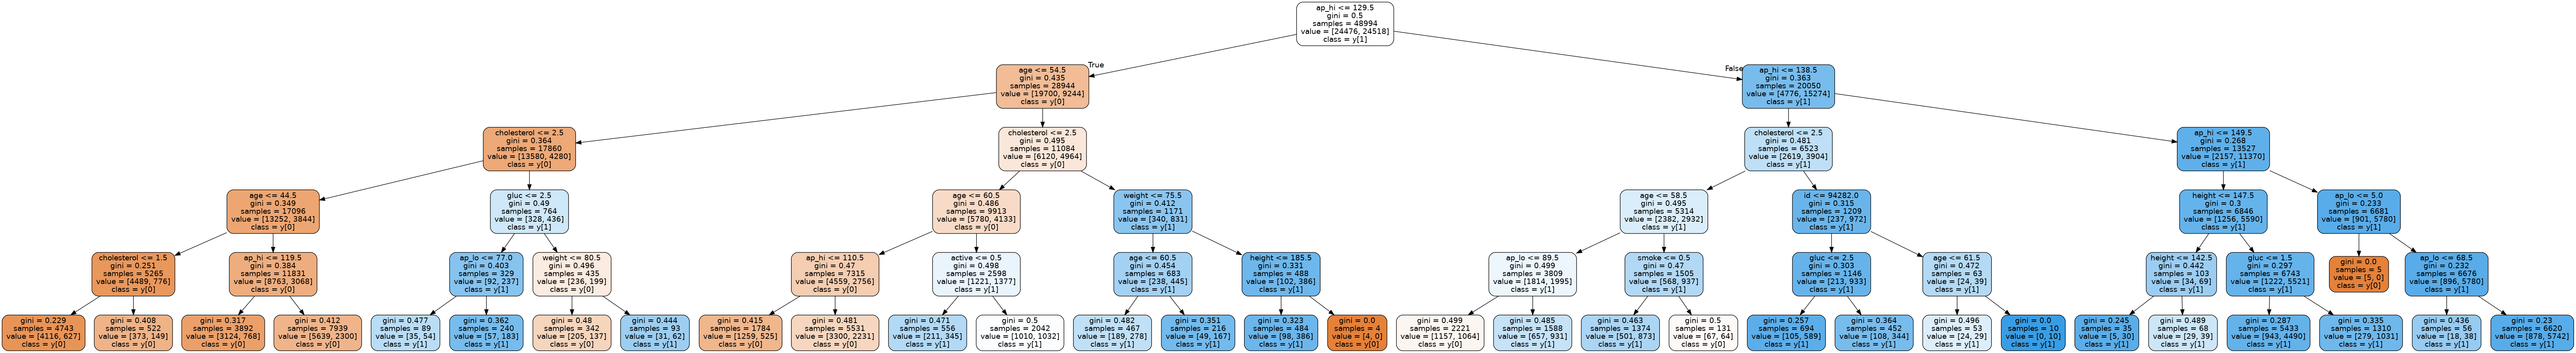

In [17]:
# Decision tree visualization with GINI
dot_data = StringIO()

export_graphviz(dt_gini, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=X.columns,
                class_names=True,
                rotate=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

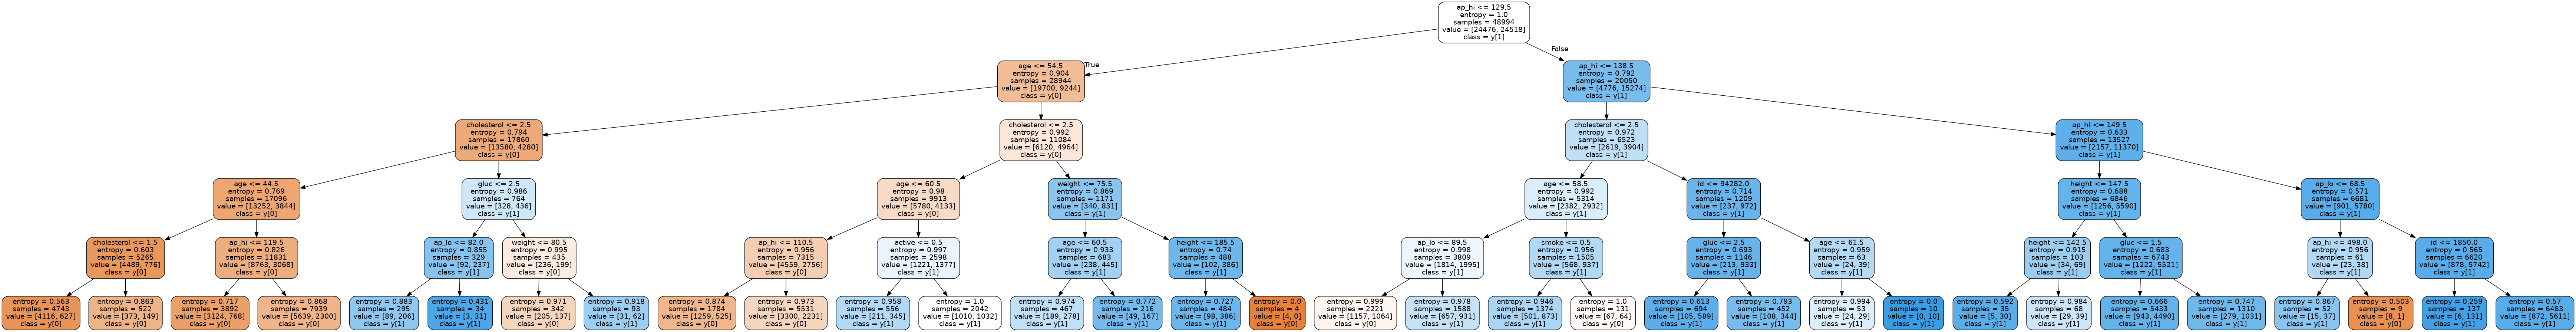

In [18]:
# Decision tree visualization with ENTROPY
dot_data = StringIO()

export_graphviz(dt_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=X.columns,
                class_names=True,
                rotate=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Naive Bayes

1) Use Naive bayes classifier (Gaussian) to predict the test data[2.5 point]

In [19]:
# Using Naive Bayes to predict the test data. We have provided our training data (X_train) and 
# target variable(y_train). nb.predict predicts the accuracy of our test data(X_test) which is 59.67% in our case.

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nbc = nb.predict(X_test)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(X_test,y_test)*100))

Accuracy of Naive Bayes: 59.67%


3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support). [2.5 points]

In [20]:
# Naive Bayes Model Evaluation
print("----------------- Confusion Matrix -----------------------")
print(confusion_matrix(y_test, y_pred_nbc))

print("----------------- Classification Report ------------------")
print(classification_report(y_test, y_pred_nbc))

----------------- Confusion Matrix -----------------------
[[9342 1199]
 [7270 3187]]
----------------- Classification Report ------------------
              precision    recall  f1-score   support

           0       0.56      0.89      0.69     10541
           1       0.73      0.30      0.43     10457

    accuracy                           0.60     20998
   macro avg       0.64      0.60      0.56     20998
weighted avg       0.64      0.60      0.56     20998

